In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


C:\Users\tisha\AppData\Local\Temp\ipykernel_6128\170592934.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna("Unknown", inplace=True)
C:\Users\tisha\AppData\Local\Temp\ipykernel_6128\170592934.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

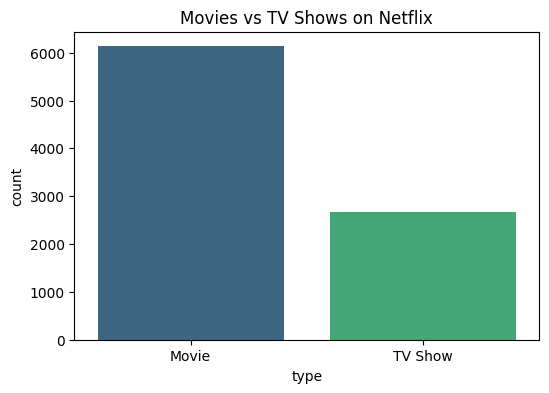

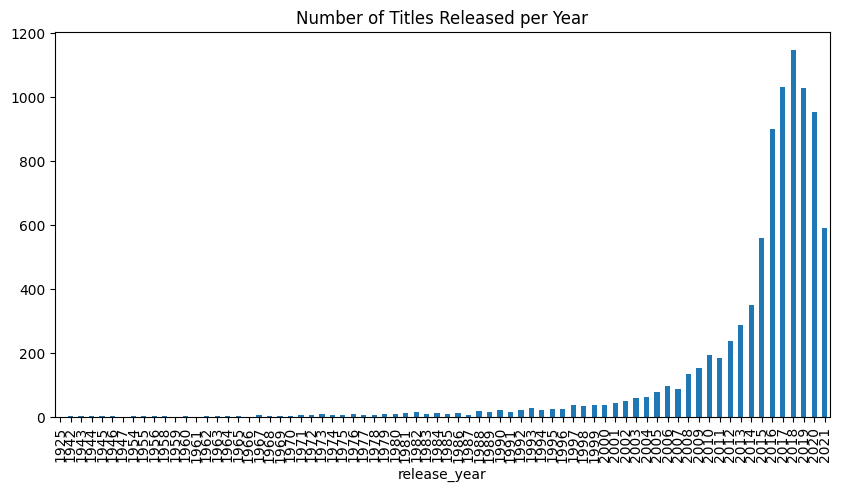

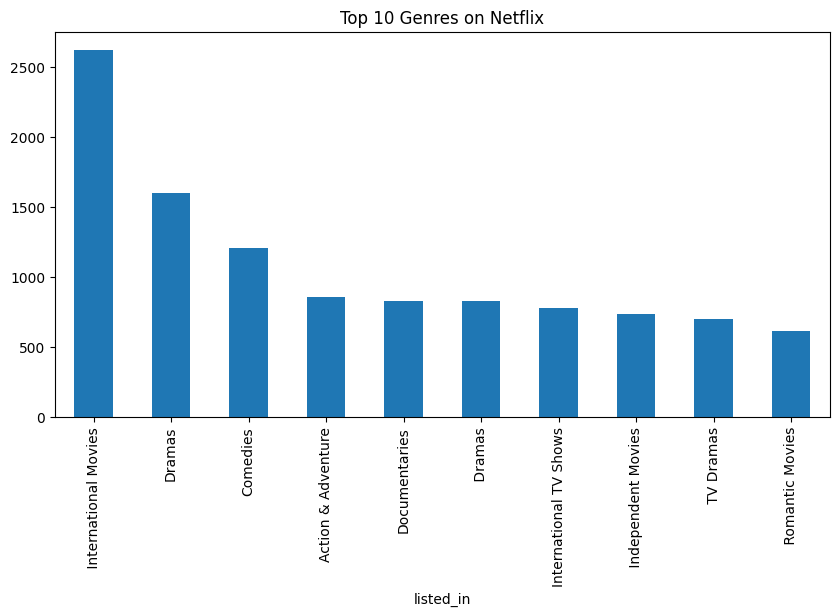

['Better Call Saul', 'The Show', 'The Lincoln Lawyer', 'Have You Ever Fallen in Love, Miss Jiang?', "Girlfriend's Day"]


In [2]:
# -----------------------------
# Netflix Data Analysis & Recommendation
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv("netflix_titles.csv")

# Data Cleaning
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)
df['listed_in'].fillna("Unknown", inplace=True)
df['description'].fillna("", inplace=True)

# Extract numeric duration
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)

# EDA Examples
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='viridis')
plt.title("Movies vs TV Shows on Netflix")
plt.show()

plt.figure(figsize=(10,5))
df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Titles Released per Year")
plt.show()

# Top genres
plt.figure(figsize=(10,5))
df['listed_in'].str.split(',').explode().value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.show()

# Combine features for recommendation
df['combined_features'] = df['director'] + ' ' + df['cast'] + ' ' + df['listed_in'] + ' ' + df['description']

# TF-IDF and cosine similarity
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommendation function
def recommend(title, n=5):
    if title not in df['title'].values:
        return ["Title not found"]
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    recommended_titles = [df.iloc[i[0]].title for i in sim_scores[1:n+1]]
    return recommended_titles

# Test
print(recommend("Breaking Bad"))
